In [148]:

##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 60% !important; }</style>"))
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
df = pd.read_csv('AirQualityUCI.csv')

In [4]:
df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10-03-2004  18:00:00     2.6       1360.0     150.0      11.9   
1     10-03-2004  19:00:00     2.0       1292.0     112.0       9.4   
2     10-03-2004  20:00:00     2.2       1402.0      88.0       9.0   
3     10-03-2004  21:00:00     2.2       1376.0      80.0       9.2   
4     10-03-2004  22:00:00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13.6  48.9  0.7578          NaN          NaN  
1           972.0  13.3  47.7  0.7255          NaN          NaN  
2          1074.0  11.9  54.0  0.7502          NaN          NaN  
3          1203.0  11.0  60.0  0.7867          NaN          NaN  
4          1110.0  11.2  59.6  0.7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9466          NaN   NaN   NaN     NaN          NaN          NaN  
9467          NaN   NaN   NaN     NaN          NaN          NaN  
9468          NaN   NaN   NaN     NaN          NaN          NaN  
9469          NaN   NaN   NaN     NaN          NaN          NaN  
9470          NaN   NaN   NaN     NaN          NaN          NaN  

[9471 rows x 17 columns]

In [5]:
df.shape

(9471, 17)

In [6]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [7]:
# df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
# 

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10-03-2004  18:00:00     2.6       1360.0     150.0      11.9   
1     10-03-2004  19:00:00     2.0       1292.0     112.0       9.4   
2     10-03-2004  20:00:00     2.2       1402.0      88.0       9.0   
3     10-03-2004  21:00:00     2.2       1376.0      80.0       9.2   
4     10-03-2004  22:00:00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9466          NaN   NaN   NaN     NaN  
9467          NaN   NaN   NaN     NaN  
9468          NaN   NaN   NaN     NaN  
9469          NaN   NaN   NaN     NaN  
9470          NaN   NaN   NaN     NaN  

[9471 rows x 15 columns]

In [9]:
# df = df.dropna()
# 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [12]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

In [15]:
sns.heatmap(df.corr(), annot=True)

plt.gcf().set_size_inches(20,20)

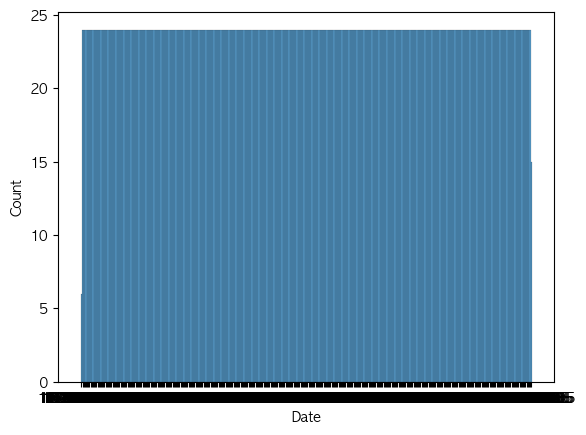

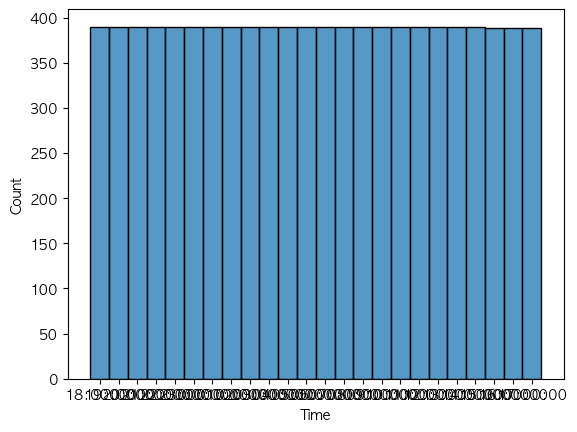

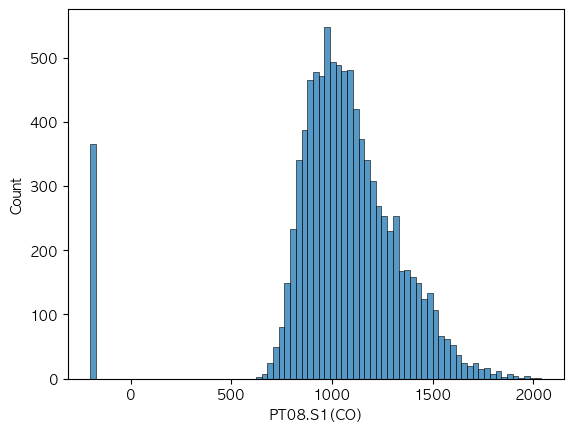

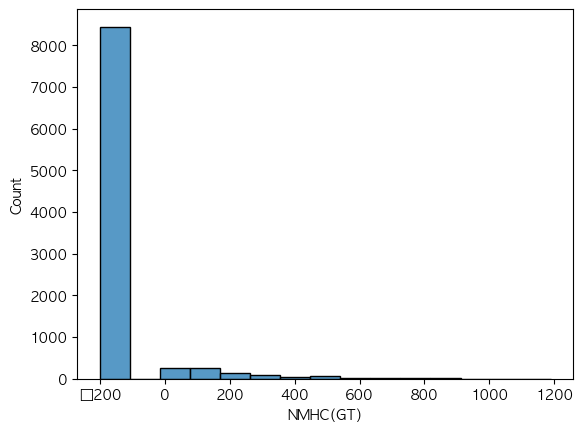

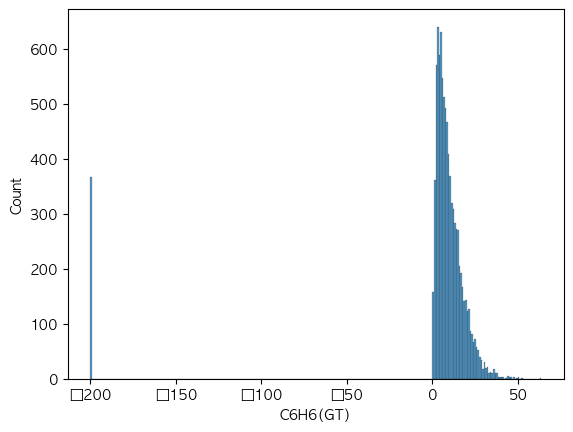

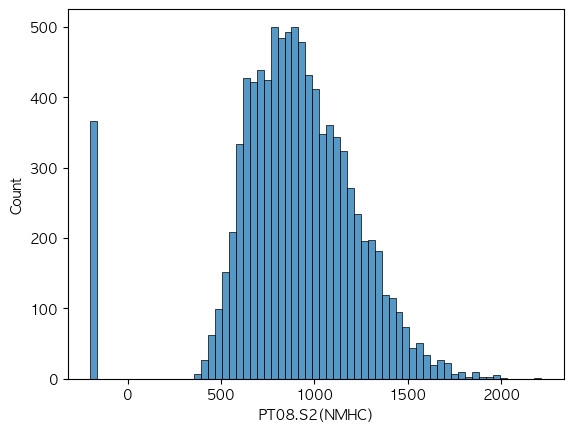

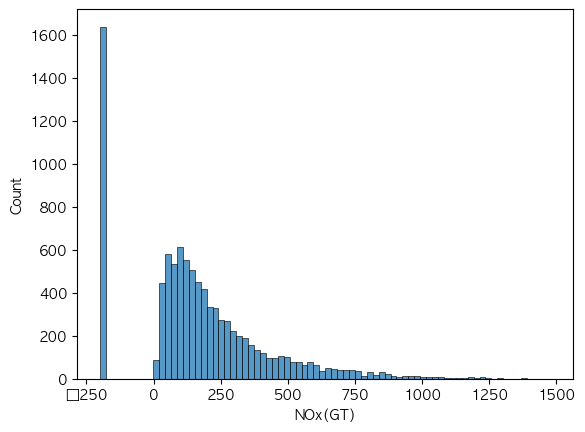

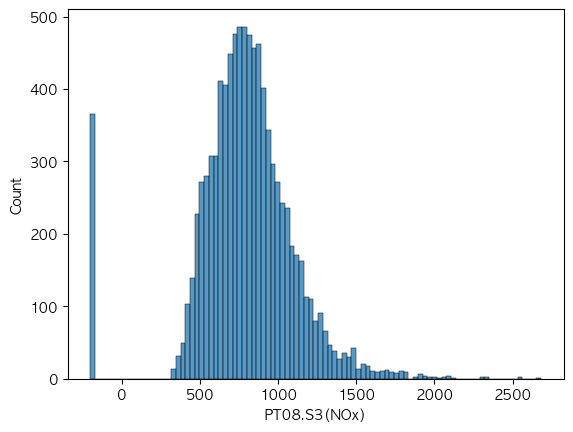

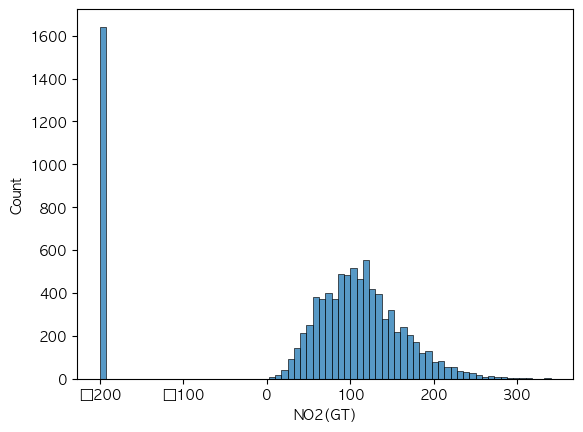

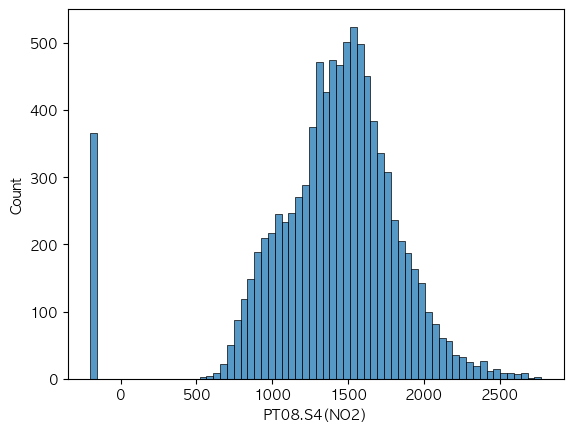

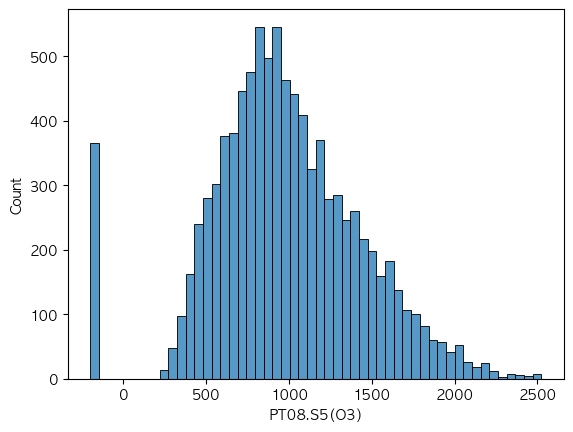

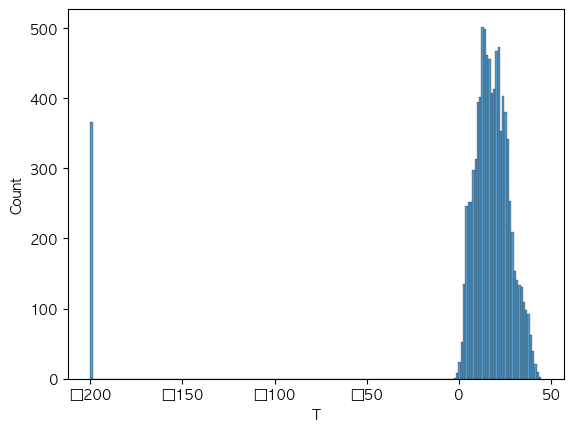

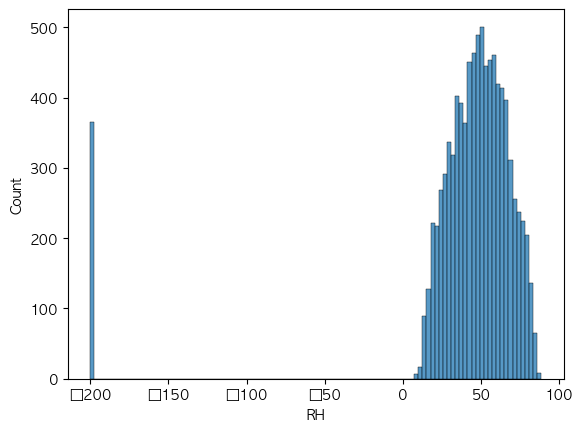

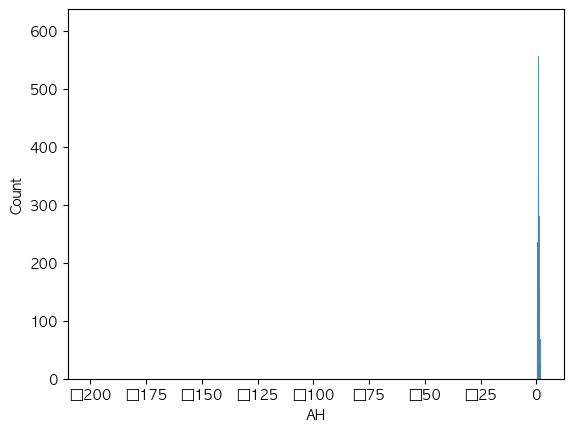

In [20]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

In [21]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

In [23]:
df.shape

(9357, 15)

In [26]:
df_check.head(2)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10-03-2004  18:00:00     2.6       1360.0     150.0      11.9   
1  10-03-2004  19:00:00     2.0       1292.0     112.0       9.4   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255

In [58]:
df_check = df[df['NOx(GT)'] != -200]
df_check['NOx(GT)'].mean()
df['NOx(GT)'] = df['NOx(GT)'].replace(-200, df_check['NOx(GT)'].mean())


Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []

In [54]:
for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = df[col].replace(-200, df_check[col].mean())

In [55]:
df.head(2)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10-03-2004  18:00:00     2.6       1360.0     150.0      11.9   
1  10-03-2004  19:00:00     2.0       1292.0     112.0       9.4   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255

In [59]:
df[df['PT08.S2(NMHC)'] == -200]

Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []

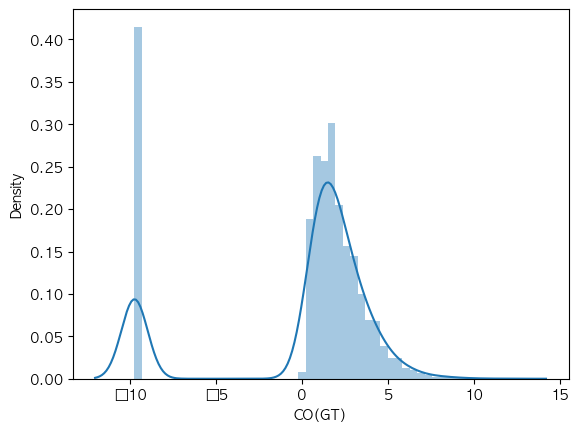

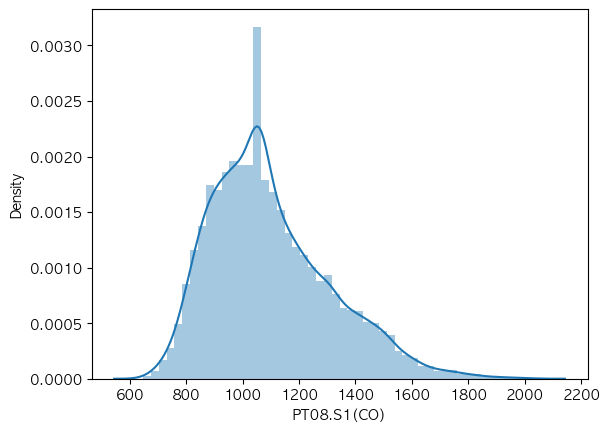

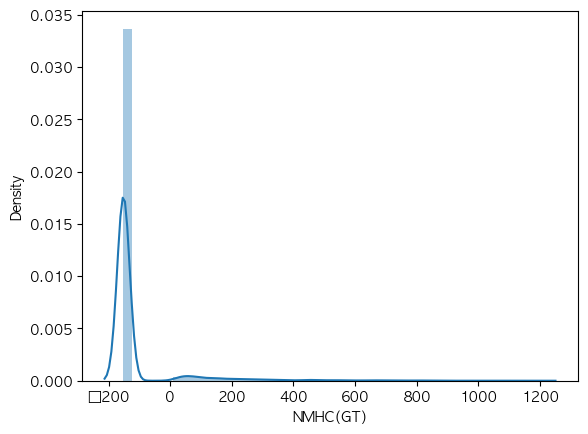

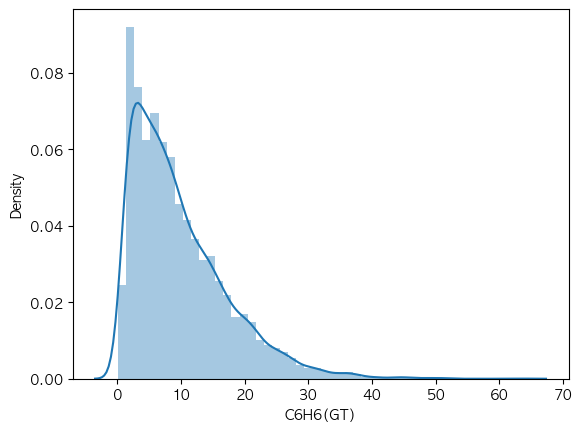

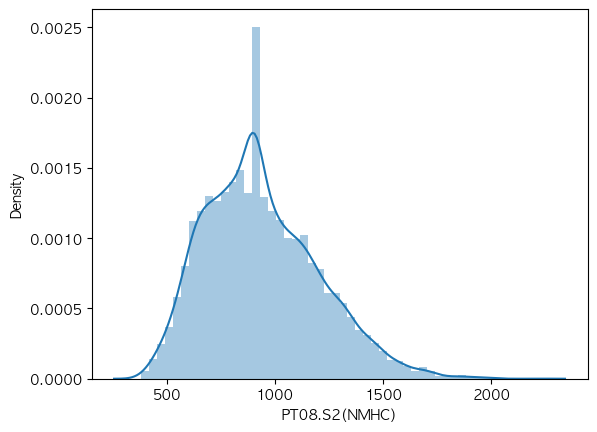

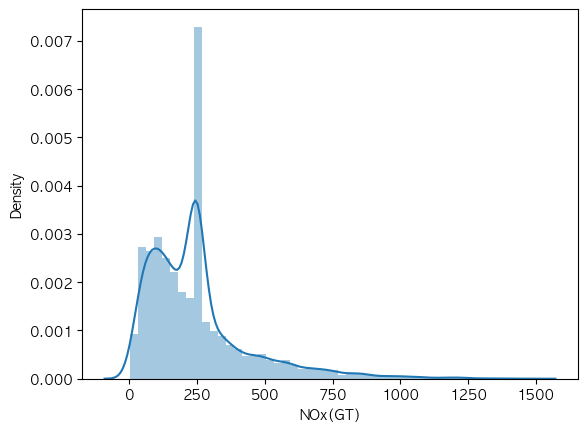

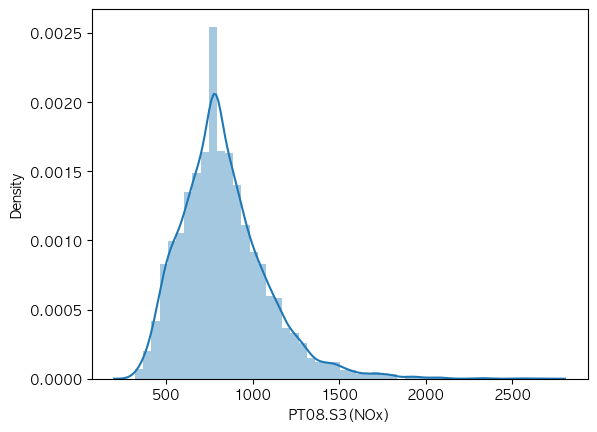

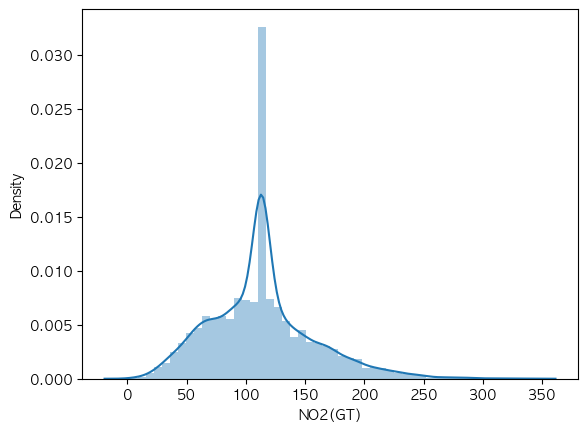

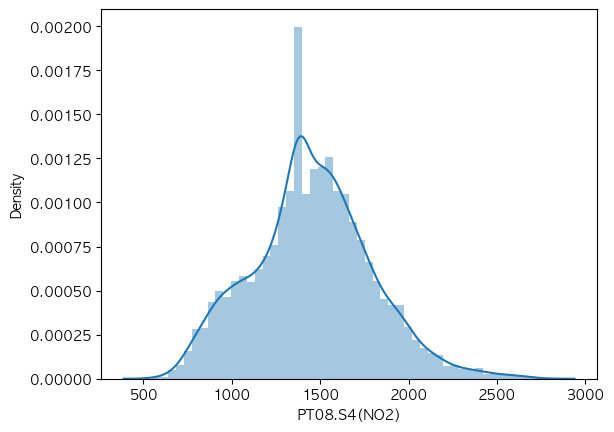

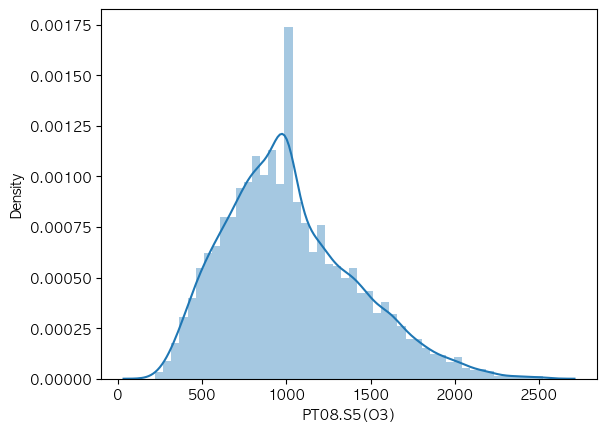

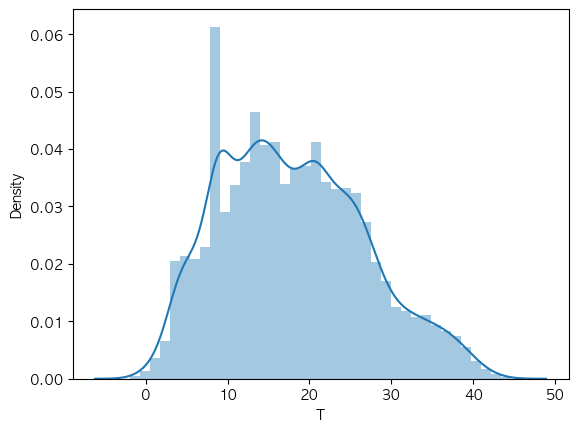

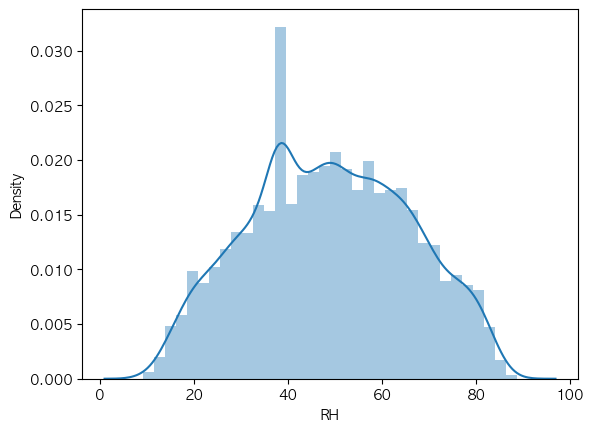

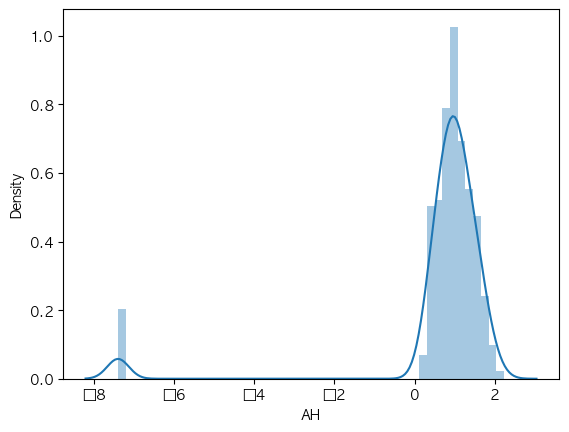

In [60]:

for col in df.columns:
    if col not in ['Date', 'Time']:
        sns.distplot(df[col])
        plt.show()

In [61]:
df.head(2)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10-03-2004  18:00:00     2.6       1360.0     150.0      11.9   
1  10-03-2004  19:00:00     2.0       1292.0     112.0       9.4   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255

<Axes: xlabel='RH', ylabel='CO(GT)'>

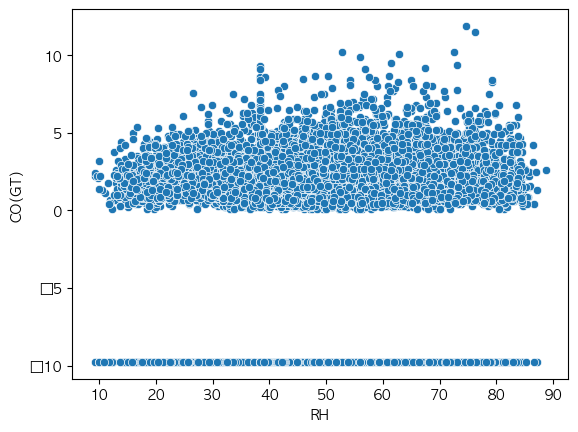

In [63]:
sns.scatterplot(data=df, x='RH',y='CO(GT)')

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_check = df.drop(['Date', 'Time'], axis=1)
df_standardized = scaler.fit_transform(df_check)
df_standardized = pd.DataFrame(df_standardized, columns=df_check.columns)
df_standardized

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
0     0.543971     1.229588  2.087160  0.287102       0.413820 -0.418252   
1     0.418017     0.910248  1.788356 -0.046871       0.066016 -0.743974   
2     0.460001     1.426827  1.599637 -0.100307       0.004863 -0.599209   
3     0.460001     1.304726  1.536731 -0.073589       0.039262 -0.387231   
4     0.334047     0.816325  1.308696 -0.434280      -0.388805 -0.599209   
...        ...          ...       ...       ...            ...       ...   
9352  0.648933     1.013564 -0.284522  0.500845       0.624031  1.163828   
9353  0.501986     0.304442 -0.284522  0.220307       0.341201  0.548575   
9354  0.501986     0.205823 -0.284522  0.353897       0.478794  0.238363   
9355  0.439009    -0.446945 -0.284522 -0.033512       0.088948 -0.061508   
9356  0.460001    -0.127605 -0.284522  0.287102       0.417642  0.093597   

      PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T        RH  \
0         0.883552 -0.001591      0.702478     0.630348 -0.491432  0.005260   
1         1.351906 -0.479748      0.310893    -0.127398 -0.525336 -0.064901   
2         1.216957  0.021178      0.299116     0.133717 -0.683553  0.303443   
3         1.026440  0.203333      0.384499     0.463951 -0.785264  0.654247   
4         1.474949  0.066717      0.107739     0.225875 -0.762661  0.630860   
...            ...       ...           ...          ...       ...       ...   
9352     -1.168478  1.751651     -0.233794     1.810486  0.446569 -1.140698   
9353     -0.910486  1.501188     -0.557662     0.632908  0.717798 -1.468115   
9354     -0.914455  1.410110     -0.625379     0.179796  1.011630 -1.783838   
9355     -0.521513  0.977492     -1.214230    -0.644508  1.169847 -2.064481   
9356     -0.712030  1.250724     -0.955136    -0.526750  1.192450 -2.087867   

            AH      year     month       day  weeofdays      hour   hour_gp  
0     0.036614 -0.562169  1.055204 -1.454161   1.492967  0.939133  1.341612  
1     0.017376 -0.562169  1.055204 -1.454161   1.492967  1.083583  1.341612  
2     0.032088 -0.562169  1.055204 -1.454161   1.492967  1.228033  1.341612  
3     0.053827 -0.562169  1.055204 -1.454161   1.492967  1.372483  1.341612  
4     0.055078 -0.562169  1.055204 -1.454161   1.492967  1.516933  1.341612  
...        ...       ...       ...       ...        ...       ...       ...  
9352  0.036019  1.778825 -0.676085 -1.340945  -1.495202 -0.216467 -0.447013  
9353  0.009276  1.778825 -0.676085 -1.340945  -1.495202 -0.072017 -0.447013  
9354 -0.033190  1.778825 -0.676085 -1.340945  -1.495202  0.072433  0.447300  
9355 -0.108652  1.778825 -0.676085 -1.340945  -1.495202  0.216883  0.447300  
9356 -0.115263  1.778825 -0.676085 -1.340945  -1.495202  0.361333  0.447300  

[9357 rows x 19 columns]

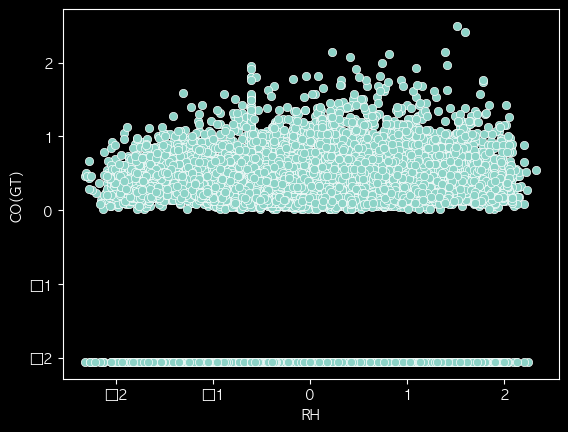

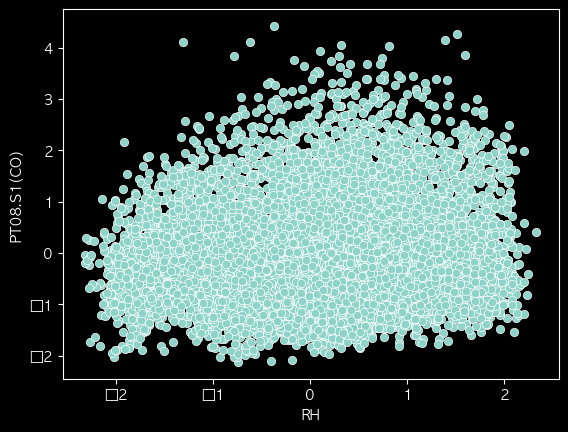

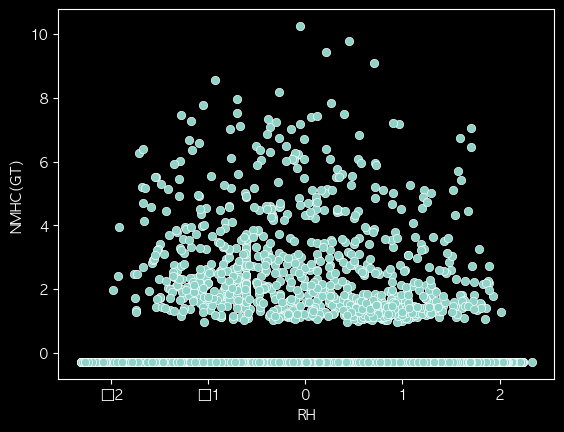

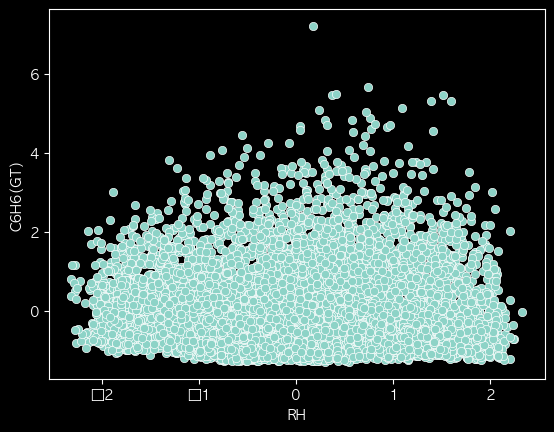

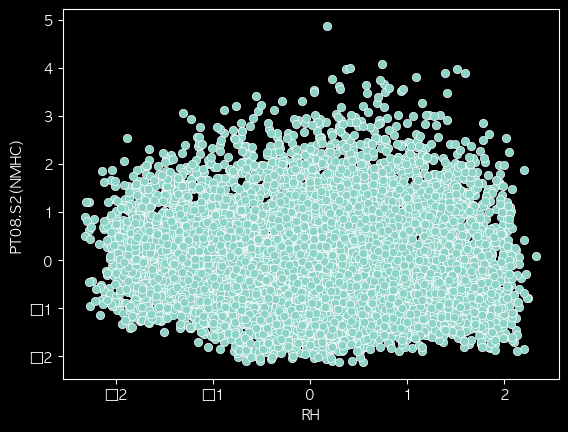

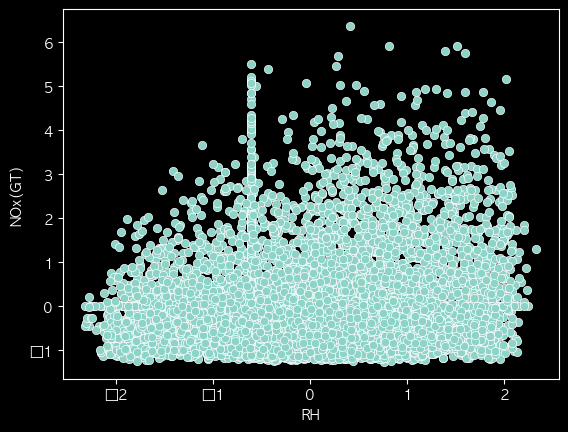

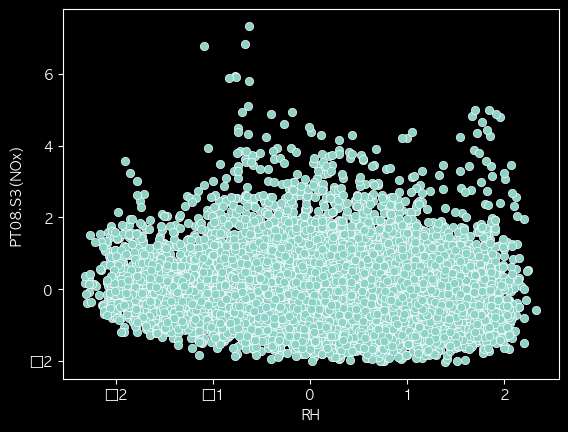

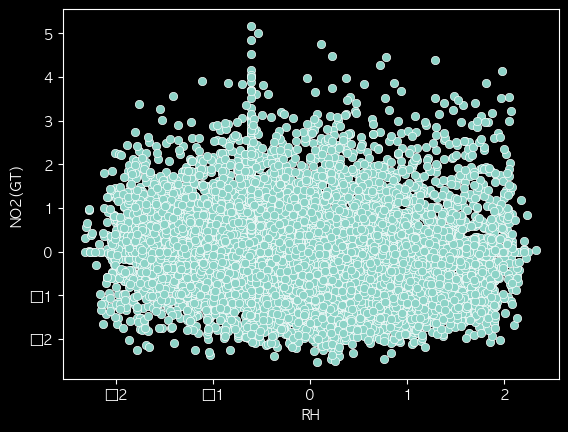

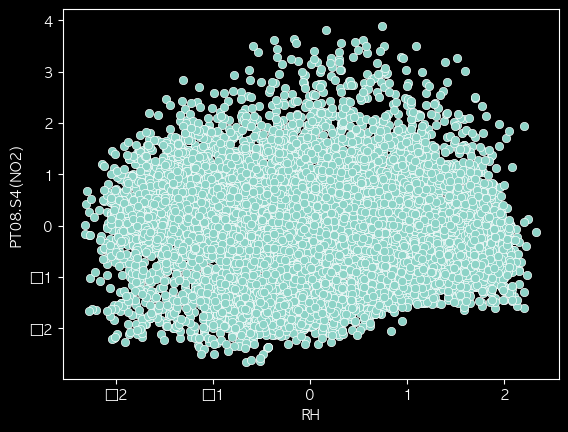

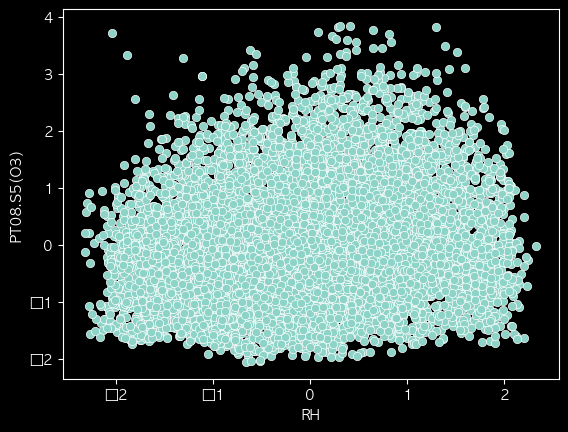

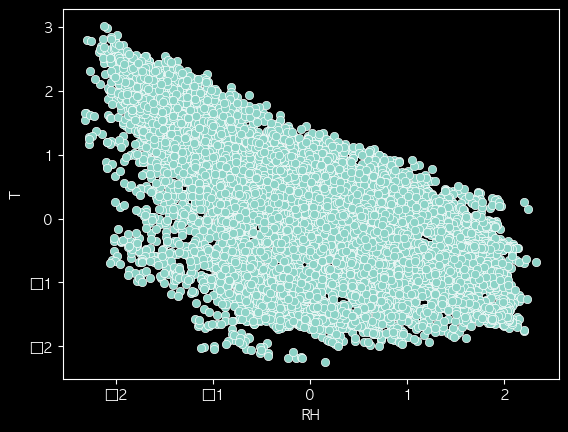

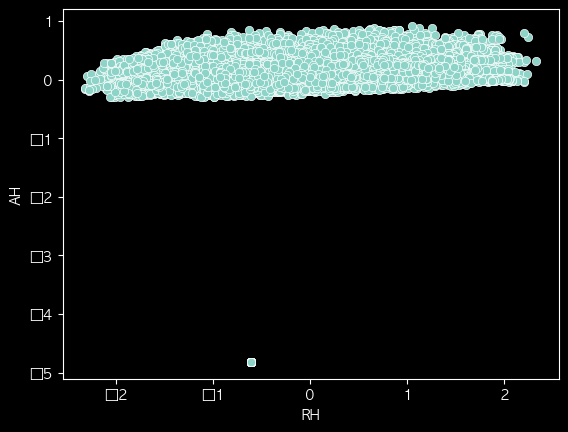

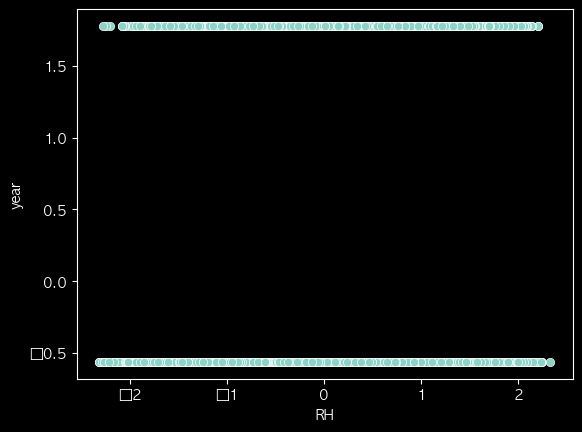

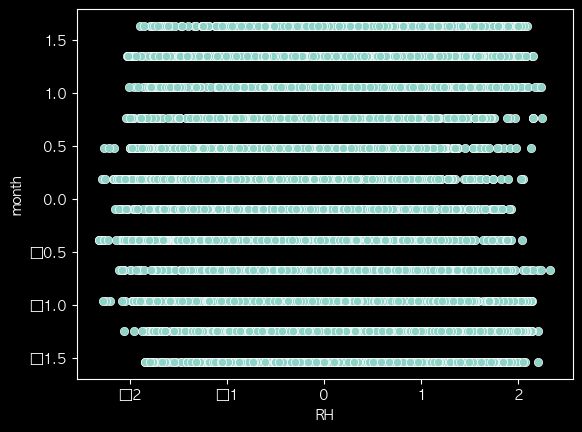

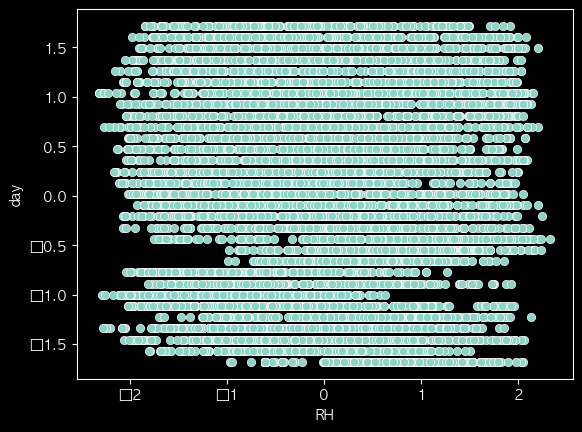

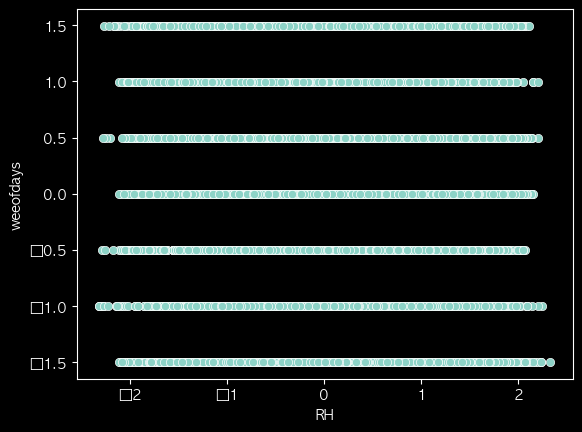

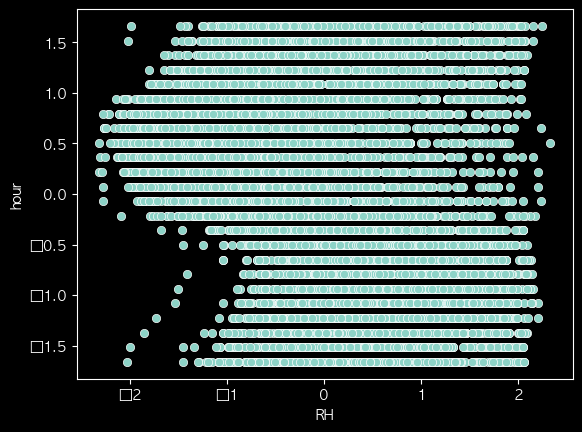

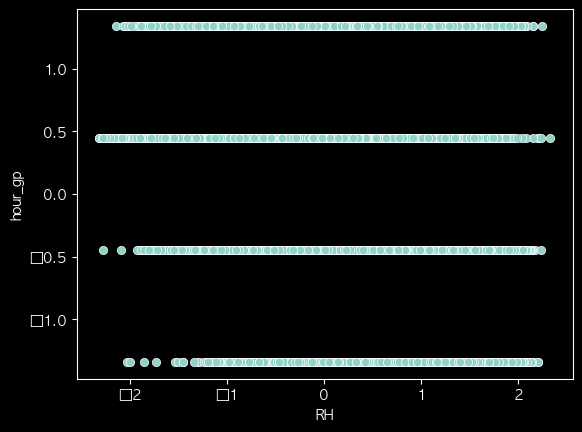

In [173]:
for col in df_standardized.columns:
    if col not in ['Date', 'Time', 'RH']:
        sns.scatterplot(data=df_standardized, x='RH',y=col)
        plt.show()

In [69]:
df['Date'].max(), df['Date'].min()

('31-12-2004', '01-01-2005')

In [75]:
df['Date'] = pd.to_datetime(df['Date'])

In [77]:
df['Date'].max(), df['Date'].min()

(Timestamp('2005-12-03 00:00:00'), Timestamp('2004-01-04 00:00:00'))

In [81]:
df

Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
0    2004-10-03  18:00:00     2.6       1360.0  150.000000      11.9   
1    2004-10-03  19:00:00     2.0       1292.0  112.000000       9.4   
2    2004-10-03  20:00:00     2.2       1402.0   88.000000       9.0   
3    2004-10-03  21:00:00     2.2       1376.0   80.000000       9.2   
4    2004-10-03  22:00:00     1.6       1272.0   51.000000       6.5   
...         ...       ...     ...          ...         ...       ...   
9352 2005-04-04  10:00:00     3.1       1314.0 -151.615185      13.5   
9353 2005-04-04  11:00:00     2.4       1163.0 -151.615185      11.4   
9354 2005-04-04  12:00:00     2.4       1142.0 -151.615185      12.4   
9355 2005-04-04  13:00:00     2.1       1003.0 -151.615185       9.5   
9356 2005-04-04  14:00:00     2.2       1071.0 -151.615185      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028  

[9357 rows x 15 columns]

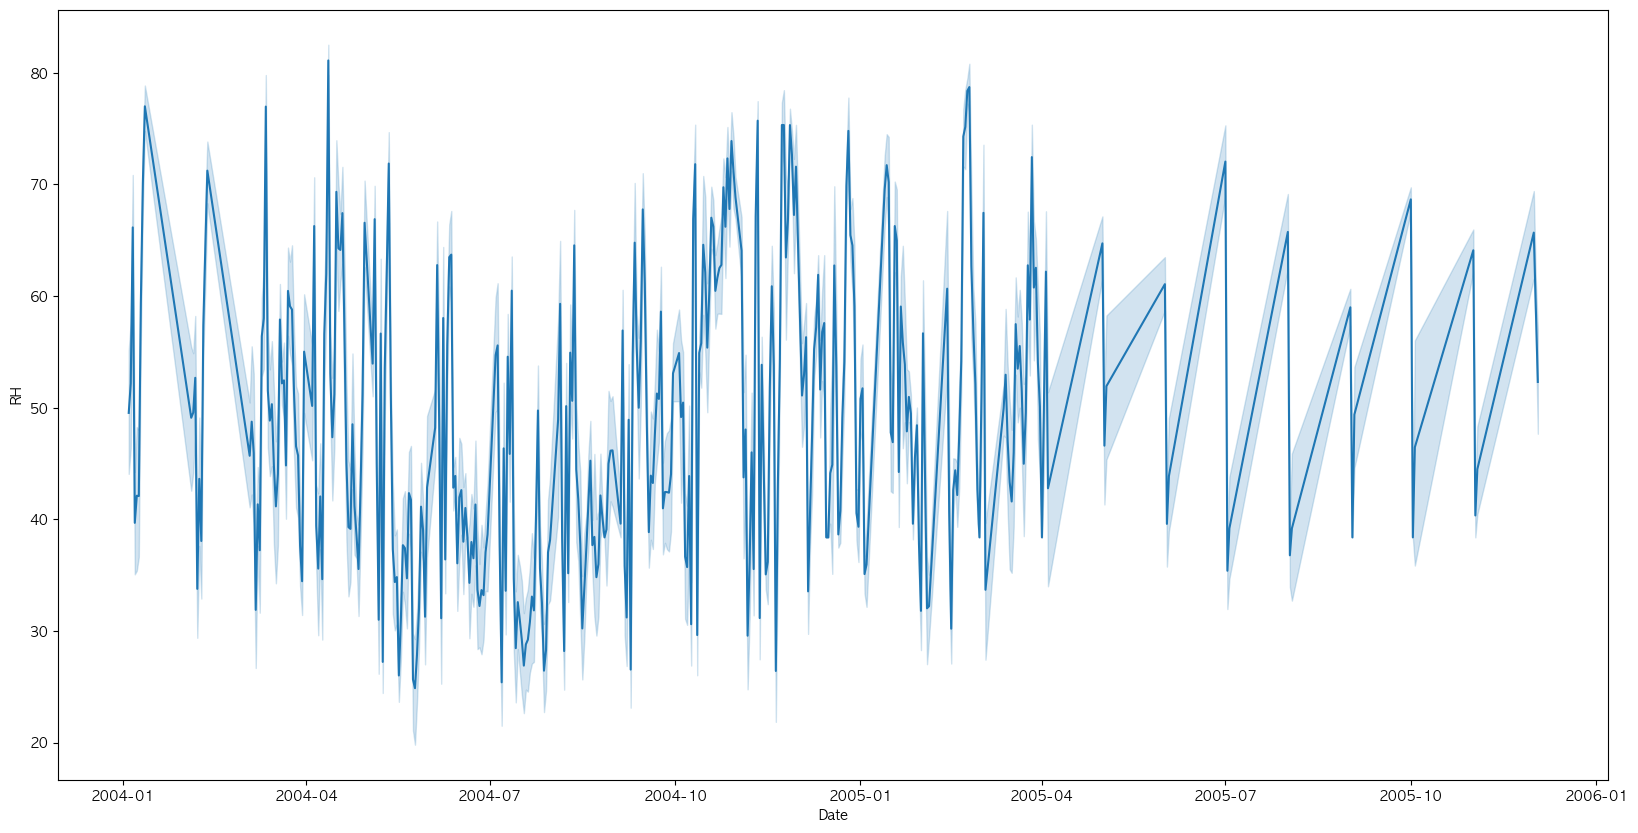

In [80]:
sns.lineplot(data=df, x='Date', y='RH')

plt.gcf().set_size_inches(20,10)

In [87]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weeofdays'] = df['Date'].dt.weekday


In [88]:
df

Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
0    2004-10-03  18:00:00     2.6       1360.0  150.000000      11.9   
1    2004-10-03  19:00:00     2.0       1292.0  112.000000       9.4   
2    2004-10-03  20:00:00     2.2       1402.0   88.000000       9.0   
3    2004-10-03  21:00:00     2.2       1376.0   80.000000       9.2   
4    2004-10-03  22:00:00     1.6       1272.0   51.000000       6.5   
...         ...       ...     ...          ...         ...       ...   
9352 2005-04-04  10:00:00     3.1       1314.0 -151.615185      13.5   
9353 2005-04-04  11:00:00     2.4       1163.0 -151.615185      11.4   
9354 2005-04-04  12:00:00     2.4       1142.0 -151.615185      12.4   
9355 2005-04-04  13:00:00     2.1       1003.0 -151.615185       9.5   
9356 2005-04-04  14:00:00     2.2       1071.0 -151.615185      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  year  month  day  weeofdays  
0          1268.0  13.6  48.9  0.7578  2004     10    3          6  
1           972.0  13.3  47.7  0.7255  2004     10    3          6  
2          1074.0  11.9  54.0  0.7502  2004     10    3          6  
3          1203.0  11.0  60.0  0.7867  2004     10    3          6  
4          1110.0  11.2  59.6  0.7888  2004     10    3          6  
...           ...   ...   ...     ...   ...    ...  ...        ...  
9352       1729.0  21.9  29.3  0.7568  2005      4    4          0  
9353       1269.0  24.3  23.7  0.7119  2005      4    4          0  
9354       1092.0  26.9  18.3  0.6406  2005      4    4          0  
9355        770.0  28.3  13.5  0.5139  2005      4    4          0  
9356        816.0  28.5  13.1  0.5028  2005      4    4          0  

[9357 rows x 19 columns]

In [93]:
df['Time'].min(), df['Time'].max()

('00:00:00', '23:00:00')

In [110]:
# df['hour'] = df['Time'].astype('str').str.split(':').str[0]
df['hour'] = df['hour'].astype('int')
df['hour_gp'] = np.where(df['hour'] < 6 , 1,
                        np.where(df['hour'] < 12 , 2,
                        np.where(df['hour'] < 18 , 3, 4
                        )))

In [113]:
df

Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
0    2004-10-03  18:00:00     2.6       1360.0  150.000000      11.9   
1    2004-10-03  19:00:00     2.0       1292.0  112.000000       9.4   
2    2004-10-03  20:00:00     2.2       1402.0   88.000000       9.0   
3    2004-10-03  21:00:00     2.2       1376.0   80.000000       9.2   
4    2004-10-03  22:00:00     1.6       1272.0   51.000000       6.5   
...         ...       ...     ...          ...         ...       ...   
9352 2005-04-04  10:00:00     3.1       1314.0 -151.615185      13.5   
9353 2005-04-04  11:00:00     2.4       1163.0 -151.615185      11.4   
9354 2005-04-04  12:00:00     2.4       1142.0 -151.615185      12.4   
9355 2005-04-04  13:00:00     2.1       1003.0 -151.615185       9.5   
9356 2005-04-04  14:00:00     2.2       1071.0 -151.615185      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  year  month  day  weeofdays  hour  \
0          1268.0  13.6  48.9  0.7578  2004     10    3          6    18   
1           972.0  13.3  47.7  0.7255  2004     10    3          6    19   
2          1074.0  11.9  54.0  0.7502  2004     10    3          6    20   
3          1203.0  11.0  60.0  0.7867  2004     10    3          6    21   
4          1110.0  11.2  59.6  0.7888  2004     10    3          6    22   
...           ...   ...   ...     ...   ...    ...  ...        ...   ...   
9352       1729.0  21.9  29.3  0.7568  2005      4    4          0    10   
9353       1269.0  24.3  23.7  0.7119  2005      4    4          0    11   
9354       1092.0  26.9  18.3  0.6406  2005      4    4          0    12   
9355        770.0  28.3  13.5  0.5139  2005      4    4          0    13   
9356        816.0  28.5  13.1  0.5028  2005      4    4          0    14   

      hour_gp  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
9352        2  
9353        2  
9354        3  
9355        3  
9356        3  

[9357 rows x 21 columns]

In [121]:
df_check = df.groupby(['year', 'month', 'day','weeofdays', 'hour_gp']).mean()
df_check = df_check.reset_index()

In [120]:
df_check

CO(GT)  PT08.S1(CO)    NMHC(GT)  \
year month day weeofdays hour_gp                                      
2004 1     4   6         1        1.066667  1013.666667   73.000000   
                         2        3.516667  1375.000000  486.166667   
                         3        2.100000  1122.351948  240.333333   
                         4        3.516667  1373.000000  441.000000   
           5   0         1       -0.061233  1066.666667  -80.512654   
...                                    ...          ...         ...   
2005 12    2   4         4        5.000000  1767.833333 -151.615185   
           3   5         1       -2.905800  1090.166667 -151.615185   
                         2       -2.989134  1078.833333 -151.615185   
                         3        0.450000  1099.000000 -151.615185   
                         4        1.400000  1198.500000 -151.615185   

                                   C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
year month day weeofdays hour_gp                                         
2004 1     4   6         1         4.133333     714.500000   99.816122   
                         2        16.433333    1162.500000  249.833333   
                         3         6.194532     950.017146  118.166667   
                         4        15.933333    1160.833333  191.666667   
           5   0         1         7.233333     845.500000  117.482789   
...                                     ...            ...         ...   
2005 12    2   4         4        23.333333    1385.666667  863.666667   
           3   5         1         3.800000     692.500000  193.000000   
                         2         4.216667     707.666667  166.333333   
                         3         5.883333     803.833333  216.666667   
                         4         8.666667     912.833333  380.500000   

                                  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  \
year month day weeofdays hour_gp                                           
2004 1     4   6         1         1102.333333   70.494925   1398.500000   
                         2          769.500000  103.333333   1856.666667   
                         3          841.561199   83.000000   1401.436728   
                         4          759.833333  132.833333   1790.333333   
           5   0         1          960.500000   75.328259   1643.666667   
...                                        ...         ...           ...   
2005 12    2   4         4          410.000000  249.666667   1624.500000   
           3   5         1          781.500000  123.333333   1087.666667   
                         2          787.666667  102.166667   1144.333333   
                         3          688.666667  127.833333   1124.333333   
                         4          633.833333  166.833333   1232.833333   

                                  PT08.S5(O3)          T         RH        AH  \
year month day weeofdays hour_gp                                                
2004 1     4   6         1         884.000000  10.733333  66.016667  0.848217   
                         2        1341.666667  14.350000  54.316667  0.854983   
                         3         952.875551  15.437711  35.545057 -3.270709   
                         4        1363.833333  18.233333  42.283333  0.864200   
           5   0         1        1057.833333  16.700000  69.233333  1.303033   
...                                       ...        ...        ...       ...   
2005 12    2   4         4        2365.333333  10.800000  56.816667  0.734517   
           3   5         1         899.000000  10.133333  59.200000  0.732250   
                         2         646.166667  11.833333  62.183333  0.848533   
                         3         645.166667  17.300000  37.316667  0.725617   
                         4         981.166667  13.066667  50.550000  0.751967   

                                  hour  
year month day weeofdays hour_gp        
2004 1     4   6        

In [122]:
df_check['yearmonthday'] = df_check['year'].astype(str) + '-' + df_check['month'].astype(str) + '-' + df_check['day'].astype(str)


In [138]:
df_check['yearmonthday'] = pd.to_datetime(df_check['yearmonthday'])
df_check_dawn = df_check[df_check['hour_gp'] == 1]
df_check_morning = df_check[df_check['hour_gp'] == 2]
df_check_afternoon = df_check[df_check['hour_gp'] == 3]
df_check_evening = df_check[df_check['hour_gp'] == 4]

In [139]:
df.head(2)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-10-03  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-10-03  19:00:00     2.0       1292.0     112.0       9.4   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   

      T    RH      AH  year  month  day  weeofdays  hour  hour_gp  
0  13.6  48.9  0.7578  2004     10    3          6    18        4  
1  13.3  47.7  0.7255  2004     10    3          6    19        4

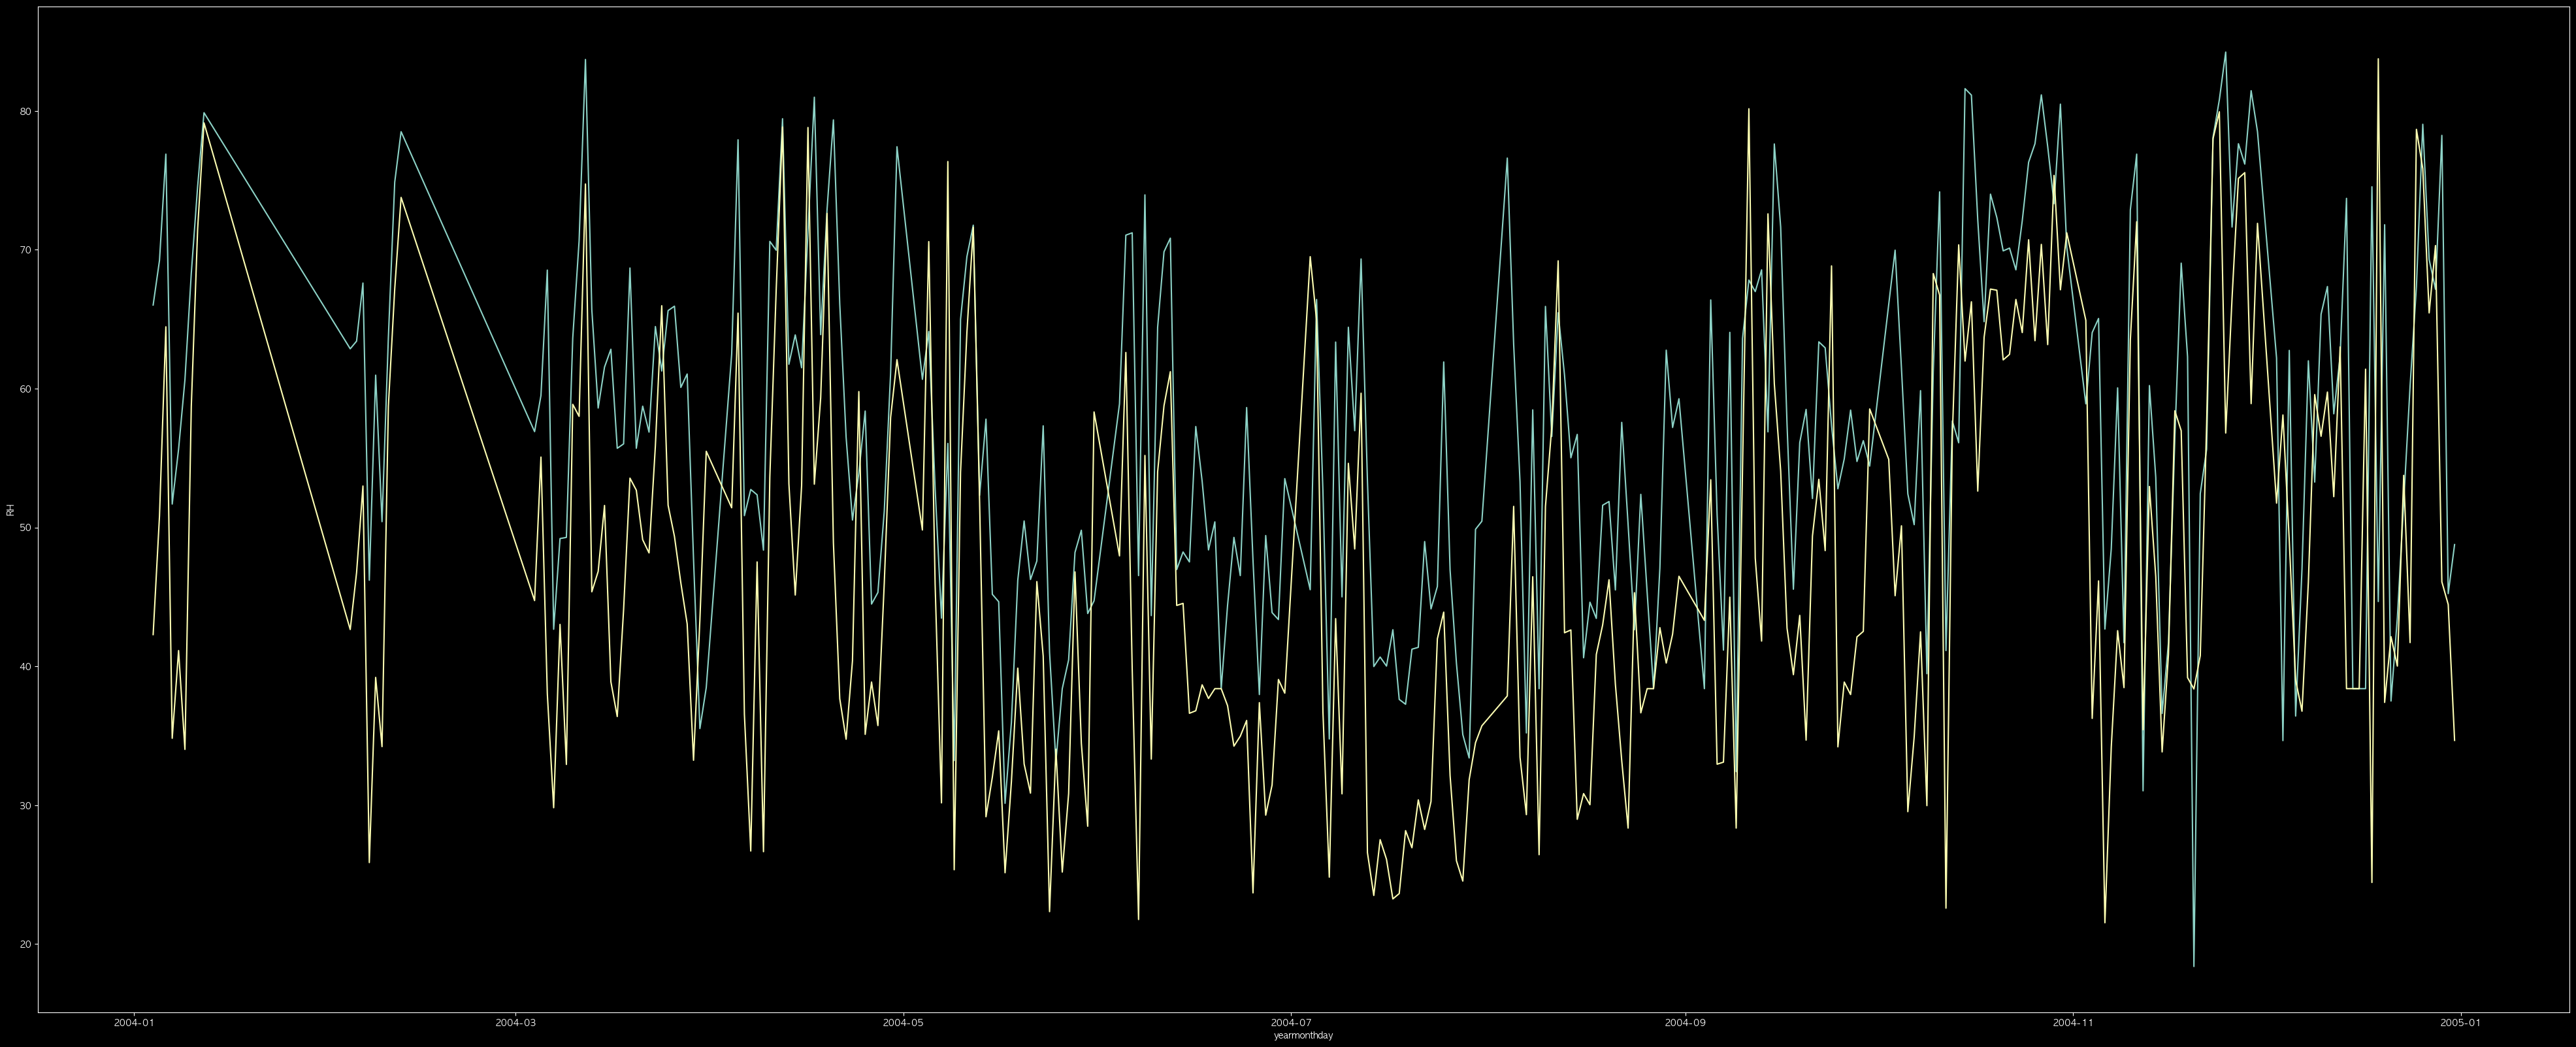

In [147]:
plt.style.use(['dark_background'])
df_check_dawn
sns.lineplot(data=df_check_dawn[df_check_dawn['year'] == 2004], x='yearmonthday', y='RH')
# sns.lineplot(data=df_check_morning, x='yearmonthday', y='RH')
# plt.gcf().set_size_inches(40,10)
# df_check_dawn
# sns.lineplot(data=df_check_afternoon, x='yearmonthday', y='RH')
# plt.gcf().set_size_inches(40,10)
# df_check_dawn
sns.lineplot(data=df_check_evening[df_check_evening['year'] == 2004], x='yearmonthday', y='RH')
plt.gcf().set_size_inches(50,20)
plt.show()

In [149]:
df

Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
0    2004-10-03  18:00:00     2.6       1360.0  150.000000      11.9   
1    2004-10-03  19:00:00     2.0       1292.0  112.000000       9.4   
2    2004-10-03  20:00:00     2.2       1402.0   88.000000       9.0   
3    2004-10-03  21:00:00     2.2       1376.0   80.000000       9.2   
4    2004-10-03  22:00:00     1.6       1272.0   51.000000       6.5   
...         ...       ...     ...          ...         ...       ...   
9352 2005-04-04  10:00:00     3.1       1314.0 -151.615185      13.5   
9353 2005-04-04  11:00:00     2.4       1163.0 -151.615185      11.4   
9354 2005-04-04  12:00:00     2.4       1142.0 -151.615185      12.4   
9355 2005-04-04  13:00:00     2.1       1003.0 -151.615185       9.5   
9356 2005-04-04  14:00:00     2.2       1071.0 -151.615185      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  year  month  day  weeofdays  hour  \
0          1268.0  13.6  48.9  0.7578  2004     10    3          6    18   
1           972.0  13.3  47.7  0.7255  2004     10    3          6    19   
2          1074.0  11.9  54.0  0.7502  2004     10    3          6    20   
3          1203.0  11.0  60.0  0.7867  2004     10    3          6    21   
4          1110.0  11.2  59.6  0.7888  2004     10    3          6    22   
...           ...   ...   ...     ...   ...    ...  ...        ...   ...   
9352       1729.0  21.9  29.3  0.7568  2005      4    4          0    10   
9353       1269.0  24.3  23.7  0.7119  2005      4    4          0    11   
9354       1092.0  26.9  18.3  0.6406  2005      4    4          0    12   
9355        770.0  28.3  13.5  0.5139  2005      4    4          0    13   
9356        816.0  28.5  13.1  0.5028  2005      4    4          0    14   

      hour_gp  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
9352        2  
9353        2  
9354        3  
9355        3  
9356        3  

[9357 rows x 21 columns]

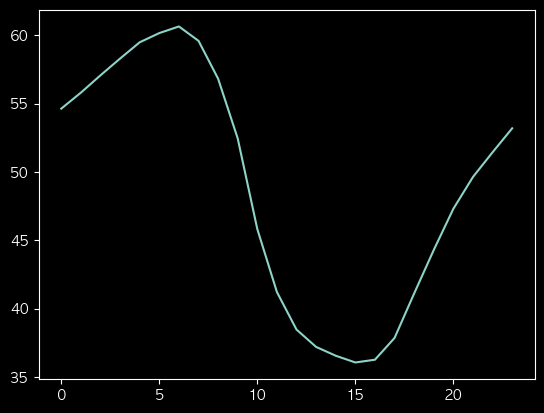

In [156]:
df.groupby('hour')['RH'].mean()

plt.plot(df.groupby('hour')['RH'].mean())


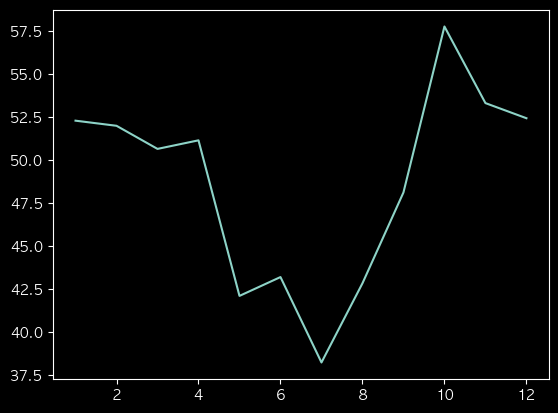

In [157]:
df.groupby('month')['RH'].mean()
plt.plot(df.groupby('month')['RH'].mean())


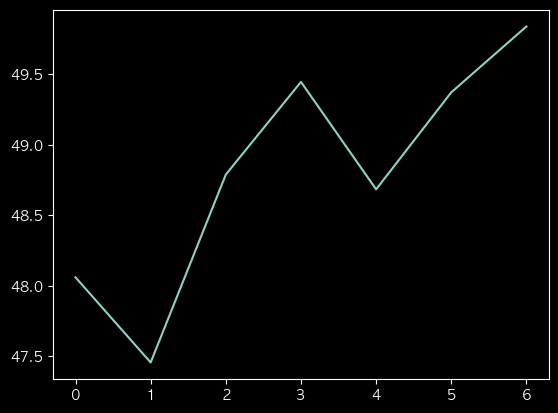

In [158]:
df.groupby('weeofdays')['RH'].mean()
plt.plot(df.groupby('weeofdays')['RH'].mean())


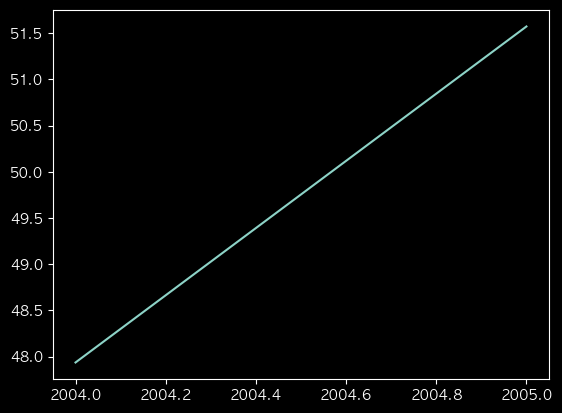

In [159]:
plt.plot(df.groupby('year')['RH'].mean())


In [175]:
df

Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
0    2004-10-03  18:00:00     2.6       1360.0  150.000000      11.9   
1    2004-10-03  19:00:00     2.0       1292.0  112.000000       9.4   
2    2004-10-03  20:00:00     2.2       1402.0   88.000000       9.0   
3    2004-10-03  21:00:00     2.2       1376.0   80.000000       9.2   
4    2004-10-03  22:00:00     1.6       1272.0   51.000000       6.5   
...         ...       ...     ...          ...         ...       ...   
9352 2005-04-04  10:00:00     3.1       1314.0 -151.615185      13.5   
9353 2005-04-04  11:00:00     2.4       1163.0 -151.615185      11.4   
9354 2005-04-04  12:00:00     2.4       1142.0 -151.615185      12.4   
9355 2005-04-04  13:00:00     2.1       1003.0 -151.615185       9.5   
9356 2005-04-04  14:00:00     2.2       1071.0 -151.615185      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  year  month  day  weeofdays  hour  \
0          1268.0  13.6  48.9  0.7578  2004     10    3          6    18   
1           972.0  13.3  47.7  0.7255  2004     10    3          6    19   
2          1074.0  11.9  54.0  0.7502  2004     10    3          6    20   
3          1203.0  11.0  60.0  0.7867  2004     10    3          6    21   
4          1110.0  11.2  59.6  0.7888  2004     10    3          6    22   
...           ...   ...   ...     ...   ...    ...  ...        ...   ...   
9352       1729.0  21.9  29.3  0.7568  2005      4    4          0    10   
9353       1269.0  24.3  23.7  0.7119  2005      4    4          0    11   
9354       1092.0  26.9  18.3  0.6406  2005      4    4          0    12   
9355        770.0  28.3  13.5  0.5139  2005      4    4          0    13   
9356        816.0  28.5  13.1  0.5028  2005      4    4          0    14   

      hour_gp  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
9352        2  
9353        2  
9354        3  
9355        3  
9356        3  

[9357 rows x 21 columns]

In [181]:
from sklearn.model_selection import train_test_split, GridSearchCV
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [182]:
df.head(2)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-10-03  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-10-03  19:00:00     2.0       1292.0     112.0       9.4   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   

      T    RH      AH  year  month  day  weeofdays  hour  hour_gp  
0  13.6  48.9  0.7578  2004     10    3          6    18        4  
1  13.3  47.7  0.7255  2004     10    3          6    19        4

In [227]:
X = df.drop(['Date', 'Time', 'hour', 'RH','T', 'AH'], axis=1)
Y = df['RH']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [241]:
from sklearn.model_selection import cross_val_score, KFold

cv  = KFold(n_splits=5, shuffle=True, random_state=1)
cv_score =cross_val_score(
rfr, x_train, y_train, cv=cv, scoring='r2', n_jobs=-1)

print(cv_score)
print(cv_score.mean())

[0.75759106 0.7510509  0.74969813 0.7624561  0.77885995]
0.7599312292973431


In [272]:
def model_check(model):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print('r2_score')
    print(r2_score(y_train, y_pred_train))
    print(r2_score(y_test, y_pred_test))
    print('mae')
    print(mean_absolute_error(y_train, y_pred_train))
    print(mean_absolute_error(y_test, y_pred_test))
    print('rmse')
    print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

    if model != lr:
        top20 = pd.Series(model.feature_importances_, x_train.columns)
        top20 = top20.sort_values(ascending=False)
        sns.barplot(x=top20, y=top20.index)
        plt.show()
    else:
        print(pd.DataFrame(model.coef_, x_train.columns))


    result = pd.DataFrame({'real':y_test, 'predicted':y_pred_test})
    result['diff'] = result['real'] - result['predicted']
    result

    plt.scatter(result['real'], result['predicted'])
    plt.plot([result['real'].min(), result['real'].max()], \
             [result['predicted'].min(), result['predicted'].max()], color='red')
    plt.show()
    
    
    cv  = KFold(n_splits=5, shuffle=True, random_state=1)
    cv_score =cross_val_score(
    model, x_train, y_train, cv=cv, scoring='r2', n_jobs=-1)

    print(cv_score)
    print(cv_score.mean())

r2_score
0.9688408944769346
0.7897411554786363
mae
2.2166355493981618
5.785353540471125
rmse
3.0328498867191174
7.757588600281059


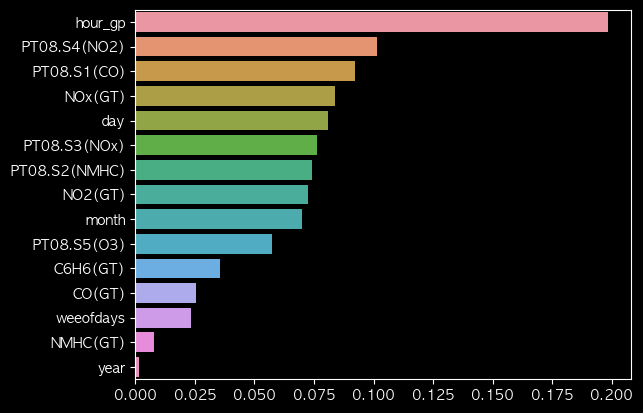

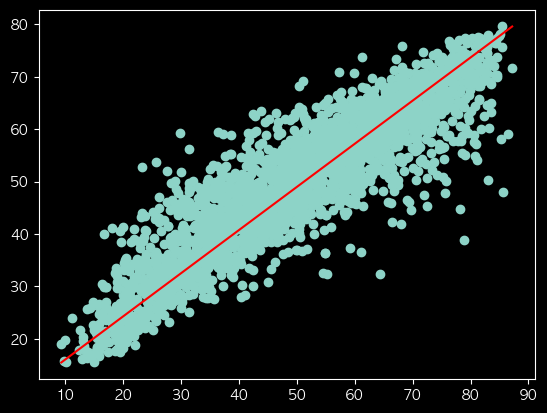

[0.76222504 0.74916589 0.75226643 0.76448137 0.77824542]
0.7612768306500841


In [269]:
model_check(rfr)

r2_score
0.9702610369876484
0.8415090128991966
mae
2.1844240239261885
5.137469615774811
rmse
2.962929612450308
6.735221654634519


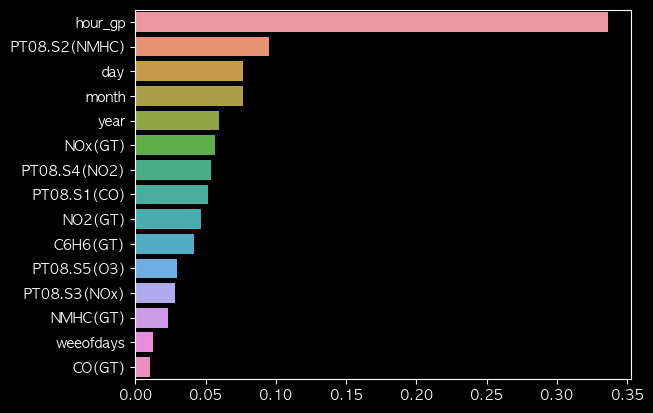

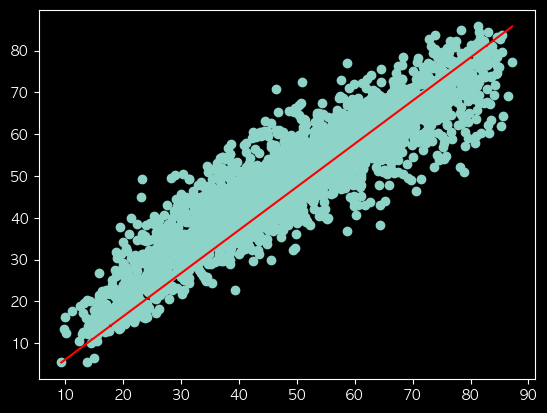

[0.82196086 0.84273747 0.82177281 0.82326234 0.8302745 ]
0.828001595724787


In [270]:
xgb_r = xgb.XGBRegressor()
model_check(xgb_r)

r2_score
0.44365645267555853
0.45612593379297184
mae
10.130008647429749
9.924022875210186
rmse
12.815334657293429
12.476672717809672
                      0
CO(GT)        -0.111336
PT08.S1(CO)    0.042630
NMHC(GT)       0.002699
C6H6(GT)       1.248849
PT08.S2(NMHC) -0.129205
NOx(GT)        0.048538
PT08.S3(NOx)  -0.019574
NO2(GT)       -0.157365
PT08.S4(NO2)   0.015125
PT08.S5(O3)    0.019086
year           0.705773
month          0.120357
day            0.010884
weeofdays     -0.258369
hour_gp       -1.770489


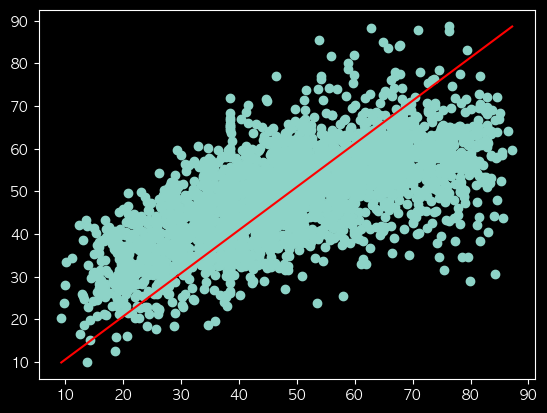

[0.46793645 0.44051226 0.3922329  0.44482749 0.45501965]
0.44010574875029534


In [273]:
lr= LinearRegression()
model_check(lr)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2389
[LightGBM] [Info] Number of data points in the train set: 6549, number of used features: 15
[LightGBM] [Info] Start training from score 48.701140
r2_score
0.8974997957086974
0.8177058021022671
mae
4.2365946803870935
5.585876714577185
rmse
5.50073584149085
7.223306291295489


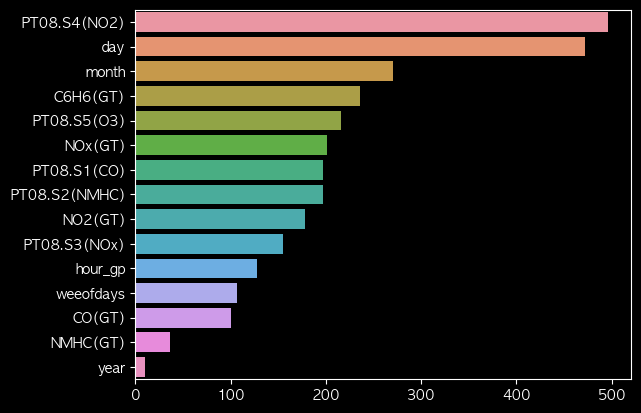

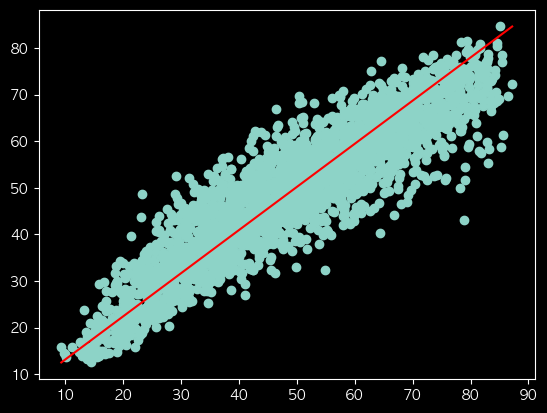

[0.81560533 0.81285327 0.79942582 0.81768217 0.81930518]
0.8129743531587014
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2335
[LightGBM] [Info] Number of data points in the train set: 5239, number of used features: 15
[LightGBM] [Info] Start training from score 48.666813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2337
[LightGBM] [Info] Number of data points in the train set: 5239, number of used features: 15
[LightGBM] [Info] Start training from score 48.626225
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [In

In [286]:
lgb_r = lgb.LGBMRegressor()
model_check(lgb_r)

In [285]:
# # RandomForestRegressor 모델 정의 및 훈련
# from sklearn.ensemble import RandomForestRegressor

# # 모델 정의
# rfr = RandomForestRegressor()

# # 모델 훈련
# rfr.fit(x_train, y_train)
# # SHAP Explainer 생성
# explainer = shap.Explainer(rfr, x_train)
# # SHAP 값을 계산
# shap_values = explainer.shap_values(x_test)
    

100%|===================| 2797/2808 [03:40<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 64.271211, while the model output was 62.799000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:
shap.summary_plot(shap_values)
shap.plots.bar(shap_values)
shap.plots.scatter(shap_values)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2337
[LightGBM] [Info] Number of data points in the train set: 5240, number of used features: 15
[LightGBM] [Info] Start training from score 48.673483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2335
[LightGBM] [Info] Number of data points in the train set: 5239, number of used features: 15
[LightGBM] [Info] Start training from score 48.666813
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2337
[LightGBM] [Info] Number of data points in the train set: 5239, number of used features: 15
[LightGBM] [Info] Start trai

In [298]:
df1 =df

In [299]:
df1.iterrows

<bound method DataFrame.iterrows of            Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
0    2004-10-03  18:00:00     2.6       1360.0  150.000000      11.9   
1    2004-10-03  19:00:00     2.0       1292.0  112.000000       9.4   
2    2004-10-03  20:00:00     2.2       1402.0   88.000000       9.0   
3    2004-10-03  21:00:00     2.2       1376.0   80.000000       9.2   
4    2004-10-03  22:00:00     1.6       1272.0   51.000000       6.5   
...         ...       ...     ...          ...         ...       ...   
9352 2005-04-04  10:00:00     3.1       1314.0 -151.615185      13.5   
9353 2005-04-04  11:00:00     2.4       1163.0 -151.615185      11.4   
9354 2005-04-04  12:00:00     2.4       1142.0 -151.615185      12.4   
9355 2005-04-04  13:00:00     2.1       1003.0 -151.615185       9.5   
9356 2005-04-04  14:00:00     2.2       1071.0 -151.615185      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0  

In [296]:
df['Time'][0].split(':')[0]

'18'

In [297]:
df['Time'].apply(lambda x: int(x.split(':')[0]))

0       18
1       19
2       20
3       21
4       22
        ..
9352    10
9353    11
9354    12
9355    13
9356    14
Name: Time, Length: 9357, dtype: int64

In [300]:
from sklearn.svm import SVR

In [301]:
svr =  SVR()
svr.fit(x_train, y_train)

SVR()

r2_score
0.9702610369876484
0.8415090128991966
mae
2.1844240239261885
5.137469615774811
rmse
2.962929612450308
6.735221654634519


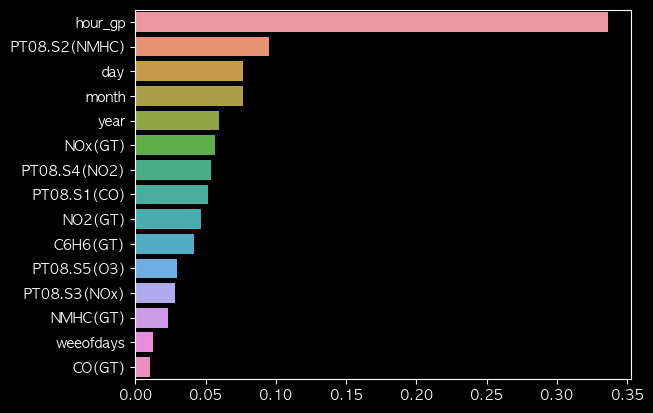

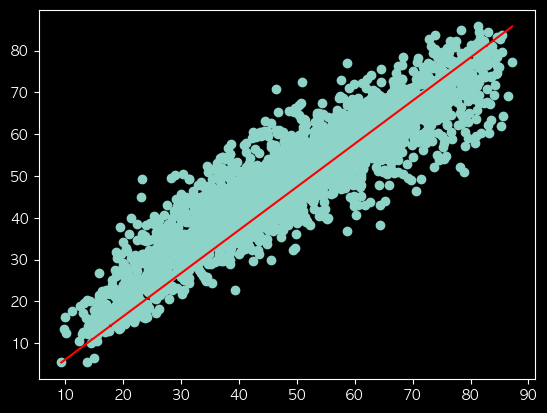

[0.82196086 0.84273747 0.82177281 0.82326234 0.8302745 ]
0.828001595724787


In [304]:
model_check(xgb_r)